## 사전작업

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import warnings
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings(action='ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from statsmodels.formula.api import ols

## 데이터 불러오기 및 전처리

In [5]:
df4 = pd.read_excel("/content/drive/MyDrive/CJ네트웍스 Remote Internship/[PBL]DataSet/분기매출데이터3.xlsx")

In [6]:
df3 = df4[['상권_코드_명', '서비스_업종_코드_명', 'Unnamed: 5', '분기당_매출_금액']]
df3 = df3.rename(columns={'Unnamed: 5':'연분기'})
df3['날짜'] = df3['연분기']

In [7]:
df3.loc[df3['연분기'] == "20171Q", '날짜'] = "2017-01-01"
df3.loc[df3['연분기'] == "20172Q", '날짜'] = "2017-04-01"
df3.loc[df3['연분기'] == "20173Q", '날짜'] = "2017-07-01"
df3.loc[df3['연분기'] == "20174Q", '날짜'] = "2017-10-01"

df3.loc[df3['연분기'] == "20181Q", '날짜'] = "2018-01-01"
df3.loc[df3['연분기'] == "20182Q", '날짜'] = "2018-04-01"
df3.loc[df3['연분기'] == "20183Q", '날짜'] = "2018-07-01"
df3.loc[df3['연분기'] == "20184Q", '날짜'] = "2018-10-01"

df3.loc[df3['연분기'] == "20191Q", '날짜'] = "2019-01-01"
df3.loc[df3['연분기'] == "20192Q", '날짜'] = "2019-04-01"
df3.loc[df3['연분기'] == "20193Q", '날짜'] = "2019-07-01"
df3.loc[df3['연분기'] == "20194Q", '날짜'] = "2019-10-01"

df3.loc[df3['연분기'] == "20201Q", '날짜'] = "2020-01-01"
df3.loc[df3['연분기'] == "20202Q", '날짜'] = "2020-04-01"
df3.loc[df3['연분기'] == "20203Q", '날짜'] = "2020-07-01"
df3.loc[df3['연분기'] == "20204Q", '날짜'] = "2020-10-01"

df3.loc[df3['연분기'] == "20211Q", '날짜'] = "2021-01-01"
df3.loc[df3['연분기'] == "20212Q", '날짜'] = "2021-04-01"
df3.loc[df3['연분기'] == "20213Q", '날짜'] = "2021-07-01"
df3.loc[df3['연분기'] == "20214Q", '날짜'] = "2021-10-01"

In [8]:
area = pd.unique(df3['상권_코드_명'])
c = list(pd.unique(df3['서비스_업종_코드_명']))
df3 = df3.set_index(['상권_코드_명', '서비스_업종_코드_명'], drop=False)

In [9]:
area

array(['가산디지털단지', '강남역', '노량진역(노량진)', '노원역', '동대문패션타운 관광특구',
       '명동 남대문 북창동 다동 무교동 관광특구', '역삼역', '을지로3가역', '잠실역', '종로·청계 관광특구'],
      dtype=object)

In [10]:
c

['운동/경기용품', '치킨전문점', '커피-음료', '편의점', '호프-간이주점', '화장품']

## Train / Test Split

In [11]:
test_df = df3.loc['을지로3가역', '커피-음료']
test_df = test_df[['날짜', '분기당_매출_금액']]
test_df['날짜'] = pd.to_datetime(test_df['날짜'])
test_df

날짜   분기당_매출_금액
상권_코드_명 서비스_업종_코드_명                       
을지로3가역  커피-음료       2017-01-01  2794849572
        커피-음료       2017-04-01  3060330797
        커피-음료       2017-07-01  3485814684
        커피-음료       2017-10-01  3155981018
        커피-음료       2018-01-01  3323085918
        커피-음료       2018-04-01  3816171562
        커피-음료       2018-07-01  3945060180
        커피-음료       2018-10-01  4018114409
        커피-음료       2019-01-01  4141721215
        커피-음료       2019-04-01  4345236076
        커피-음료       2019-07-01  4678827169
        커피-음료       2019-10-01  5307714816
        커피-음료       2020-01-01  4909478284
        커피-음료       2020-04-01  5117317281
        커피-음료       2020-07-01  4983593286
        커피-음료       2020-10-01  4379988870
        커피-음료       2021-01-01  4090067810
        커피-음료       2021-04-01  5102400114
        커피-음료       2021-07-01  5339955133
        커피-음료       2021-10-01  6231825578

In [12]:
train = test_df[test_df['날짜'] <= '2021-01-01']
print('train shape', train.shape)
train
train1 = train

train shape (17, 2)


In [13]:
test = test_df[test_df['날짜'] >= '2021-01-01']
print('test shape', test.shape)
test

test shape (4, 2)


날짜   분기당_매출_금액
상권_코드_명 서비스_업종_코드_명                       
을지로3가역  커피-음료       2021-01-01  4090067810
        커피-음료       2021-04-01  5102400114
        커피-음료       2021-07-01  5339955133
        커피-음료       2021-10-01  6231825578

In [14]:
train1
train1 = train1.set_index(['날짜'])

## 모델 적용하기 ( Prophet by FaceBook )



In [15]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import prophet
print(prophet.__version__)

1.1.1


#### 모델 학습

In [17]:
# 컬럼명 변경
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

# 데이터 타입 변경
train['ds']= pd.to_datetime(train['ds'])
test['ds']= pd.to_datetime(test['ds'])

# 모델 생성
from prophet import Prophet
model = Prophet()

# 모델 학습
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsvmdhq0/f1ng6ee1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsvmdhq0/ri8zax9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64593', 'data', 'file=/tmp/tmprsvmdhq0/f1ng6ee1.json', 'init=/tmp/tmprsvmdhq0/ri8zax9k.json', 'output', 'file=/tmp/tmprsvmdhq0/prophet_modelcfs_dj2t/prophet_model-20221117091059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

#### 모델 예측

In [18]:
last_1year = list()

last_1year.append(['2021-01-01'])
last_1year.append(['2021-04-01'])
last_1year.append(['2021-07-01'])
last_1year.append(['2021-10-01'])

last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

In [19]:
forecast = model.predict(last_1year)

In [20]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds          yhat    yhat_lower    yhat_upper
0 2021-01-01  4.409995e+09  4.210472e+09  4.599662e+09
1 2021-04-01  5.276116e+09  5.098408e+09  5.485308e+09
2 2021-07-01  5.458837e+09  5.266883e+09  5.648406e+09
3 2021-10-01  5.151791e+09  4.969748e+09  5.357542e+09


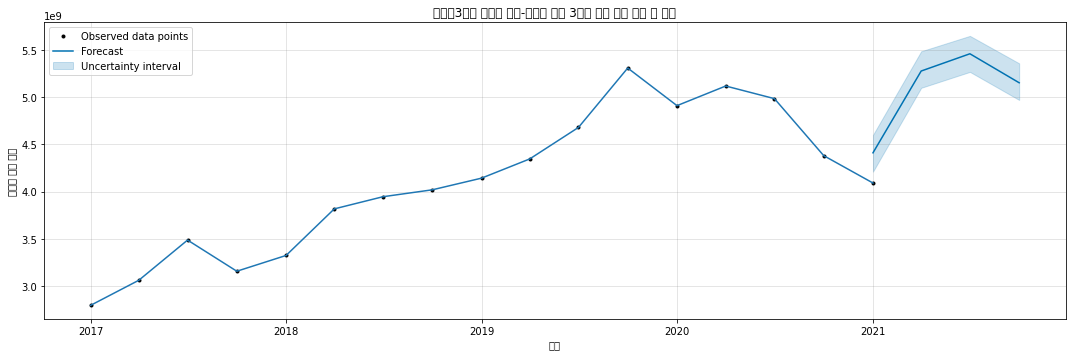

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
model.plot(forecast, ax = ax)
chart = sns.lineplot(x=train1.index, y='분기당_매출_금액', data = train1)
chart.set_title('을지로3가역 상권의 커피-음료의 최근 3개년 매출 추이 예측 및 분석')
plt.xlabel("분기")
plt.ylabel("분기별 매출 금액")
plt.show()

### 모델 평가

In [22]:
y_true = test['y'].values
y_true

array([4090067810, 5102400114, 5339955133, 6231825578])

In [23]:
y_pred = forecast['yhat'].values
y_pred_lower = forecast['yhat_lower'].values

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 423140162.956


In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred_lower)
print('MAE: %.3f' % mae)

MAE: 364886430.192


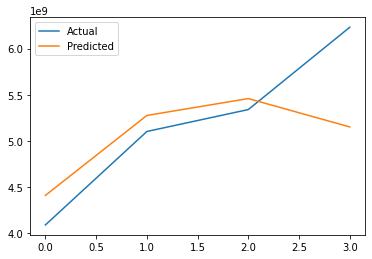

In [26]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

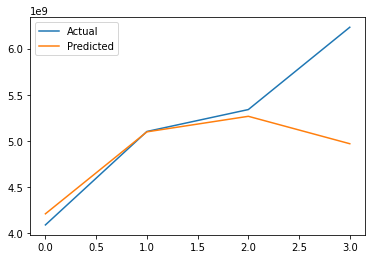

In [27]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred_lower, label='Predicted')
plt.legend()
plt.show()

In [28]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/향후 매출 예측하기_221114.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/향후 매출 예측하기_221114.ipynb to html
[NbConvertApp] Writing 310480 bytes to /content/drive/MyDrive/Colab Notebooks/향후 매출 예측하기_221114.html
